Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) `Primary Fuel`    2) `capacity_mw`

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score,roc_curve,plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
import warnings
warnings.filterwarnings("ignore")

In [115]:
data=pd.read_csv(r"C:\Users\myids\OneDrive\Documents\GitHub\Evaluation Projects DATA\database_IND.csv")

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


Top 5 no. of records of the GlobalPowerPlant dataset.

In [4]:
data.shape

(907, 27)

In [5]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

datatypes of columns either of float type or object.

In [6]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh` (number): estimated electricity generation in gigawatt-hours.

In [7]:
data.shape

(907, 27)

Dataset has 908 no. of records and 25 columns.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In some columns there are 0 non-null values in one columns there is only 1 non-null values. 

13 columns are of float types and 12 are of object types.

Memory usage is 177.4kb.

In [9]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

`estimated_generation_gwh`,`other_fuel3`,`wepp_id` these are columns that has null values only.

In [10]:
data['other_fuel1']=data['other_fuel1'].fillna(data.other_fuel1.mode()[0])

Here i replaced Null values with the most occured fuel.

In [11]:
data.other_fuel1.value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

now we can drop other_fuel_2,other_fuel_3 these two columns. other_fuel_3 it has all null values in it.

wepp+id,estimated_generation_gwh these two columns also has to drop as these has no values in it.

In [12]:
data.country.value_counts()

IND    907
Name: country, dtype: int64

In [13]:
data.country_long.value_counts()

India    907
Name: country_long, dtype: int64

country,country_long these two columns also has to be dropped. As these contains only single values in it.

In [14]:
data['owner'].fillna(data.owner.mode()[0],inplace=True)

filled nan values in owner with their mode value.

In [15]:
data.commissioning_year.mean()

1997.0910815939278

In [16]:
data.commissioning_year.median()

2001.0

In [17]:
data.commissioning_year.mode()[0]

2015.0

In [18]:
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mean())

In [19]:
data.commissioning_year.isna().sum()

0

filled null values of commisioning_year with the median occured.

In [20]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                   0
other_fuel2                 906
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [21]:
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].median())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median())
data["generation_gwh_2016"]=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median())

In [22]:
data['generation_data_source'].fillna(data.generation_data_source.mode()[0],inplace=True)

In [23]:
data['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [24]:
data['year_of_capacity_data'].fillna(data.year_of_capacity_data.mode()[0],inplace=True)

In [25]:
data['geolocation_source'].fillna(data.geolocation_source.mode()[0],inplace=True)

In [26]:
data.latitude.fillna(data.latitude.mean(),inplace=True)
data.longitude.fillna(data.longitude.mean(),inplace=True)

In [27]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 906
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

all thses columns that showinf null values these columns has no values, So, i decided its better to drop these columns.

In [28]:
data.country.unique()

array(['IND'], dtype=object)

In [29]:
data.country_long.unique()

array(['India'], dtype=object)

In [30]:
data.year_of_capacity_data.unique()

array([2019.])

In [31]:
data.drop(columns=['country', 'country_long','wepp_id', 'other_fuel2','other_fuel3','estimated_generation_gwh', 'year_of_capacity_data'],inplace=True)

<AxesSubplot:>

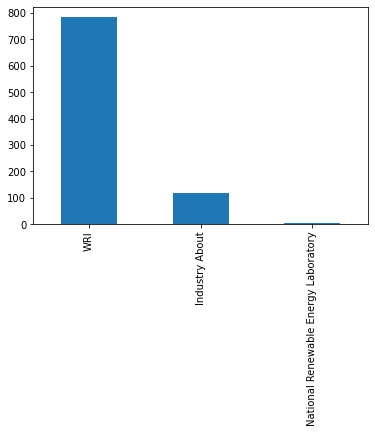

In [32]:
data['geolocation_source'].value_counts().plot(kind='bar')

In [33]:
data['geolocation_source']=data['geolocation_source'].fillna("WRI")

<AxesSubplot:>

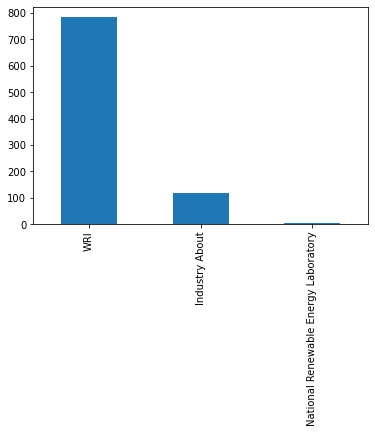

In [34]:
data['geolocation_source'].value_counts().plot(kind='bar')

In [35]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source'],
      dtype='object')

In [36]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source'],
      dtype='object')

In [37]:
#### Plotting featurse v/s primary_fuel

<AxesSubplot:xlabel='name', ylabel='primary_fuel'>

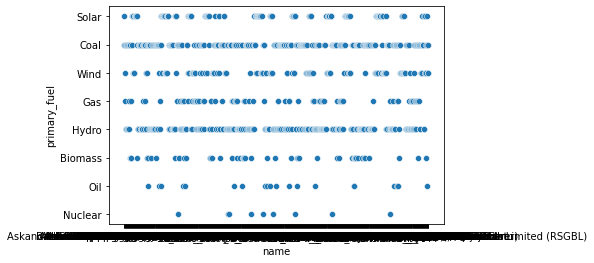

In [38]:
sns.scatterplot(data['name'],data['primary_fuel'])

as name are disributed to all class of primary_fuel.

<AxesSubplot:xlabel='name', ylabel='capacity_mw'>

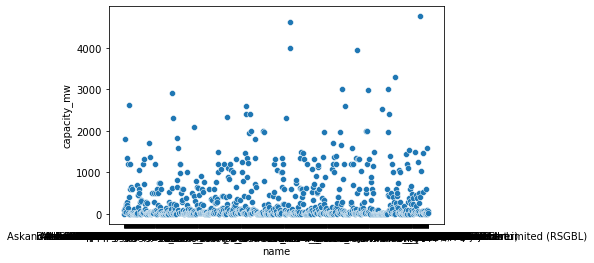

In [39]:
sns.scatterplot(data['name'],data['capacity_mw'])

the powerplant has average  capacity in range 1000 to 1500.

<AxesSubplot:xlabel='gppd_idnr', ylabel='primary_fuel'>

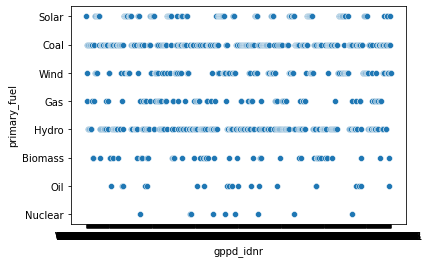

In [40]:
sns.scatterplot(data['gppd_idnr'],data['primary_fuel'])

In [41]:
len(data['gppd_idnr'].unique().tolist())

907

gpdp_idnr has unique id of power plant that are distributed to all classes of primary_fuel

<AxesSubplot:xlabel='gppd_idnr', ylabel='capacity_mw'>

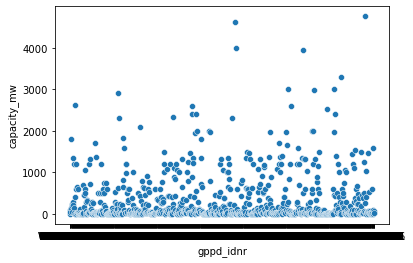

In [42]:
sns.scatterplot(data['gppd_idnr'],data['capacity_mw'])

Only some Powerplant are producing capacity greater then 3000.

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

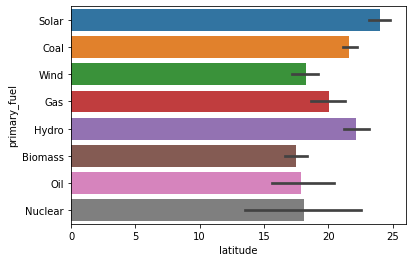

In [43]:
sns.barplot(data['latitude'],data['primary_fuel'])

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

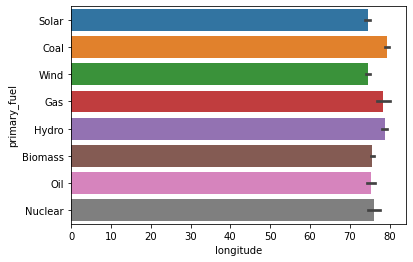

In [44]:
sns.barplot(data['longitude'],data['primary_fuel'])

latitude,longitude of the powerplant location are distributes to all class of primary class.

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

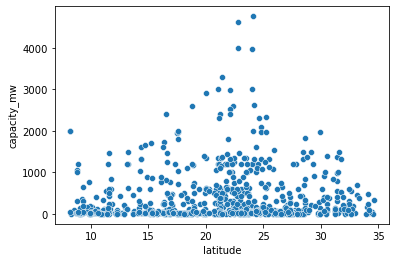

In [45]:
sns.scatterplot(data['latitude'],data['capacity_mw'])

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

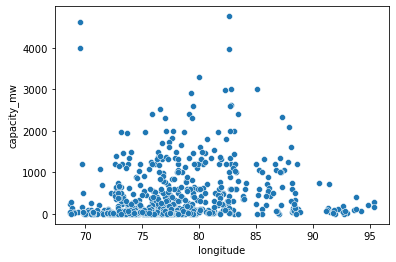

In [46]:
sns.scatterplot(data['longitude'],data['capacity_mw'])

latitude range 20-25 and longitude range o 80 to 85 has high capacity of production.

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

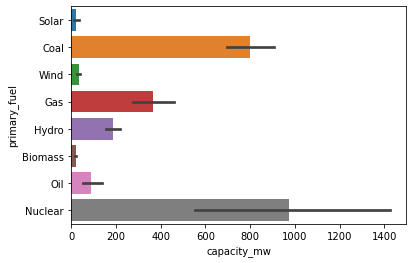

In [47]:
sns.barplot(data['capacity_mw'],data['primary_fuel'])

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

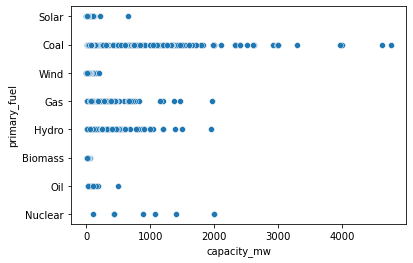

In [48]:
sns.scatterplot(data['capacity_mw'],data['primary_fuel'])

capacity_mw for nuclear and coal class of primary_fuel is more w.r.t. other classes.

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

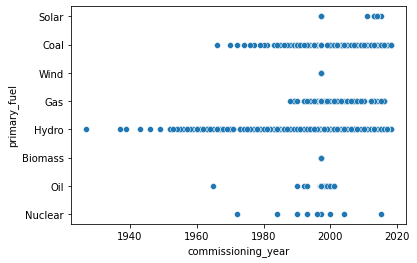

In [49]:
sns.scatterplot(data['commissioning_year'],data['primary_fuel'])

Hydro class type of primary_fuel is distributed or exported before 1940.

Biomass class of primary_fuel is exported after 2000.

gas type of fuel is exported after 1980.

oil & Coal are exported after 1960.

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

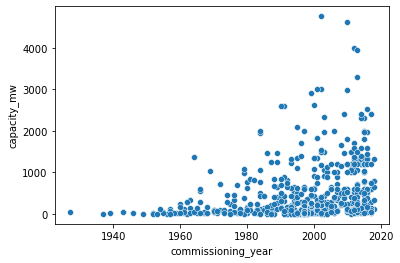

In [50]:
sns.scatterplot(data['commissioning_year'],data['capacity_mw'])

the capacity is gradually inceasing w.r.t. commisioning_year.

<AxesSubplot:xlabel='other_fuel1', ylabel='primary_fuel'>

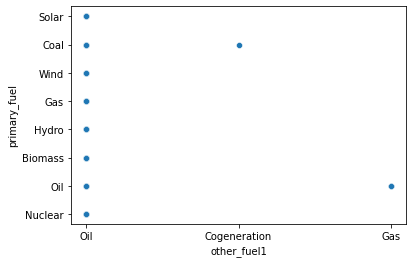

In [51]:
sns.scatterplot(data['other_fuel1'],data['primary_fuel'])

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

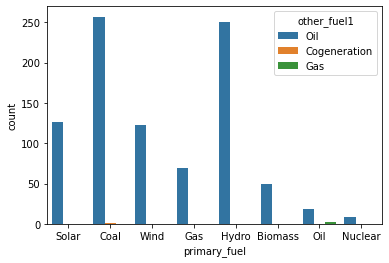

In [52]:
sns.countplot(data['primary_fuel'],hue=data['other_fuel1'])

most of powerplants has no other fuels except their primary fuel oil has some type of fuels..

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

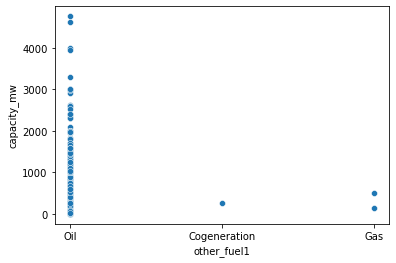

In [53]:
sns.scatterplot(data['other_fuel1'],data['capacity_mw'])

Oil has highest capacity.

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

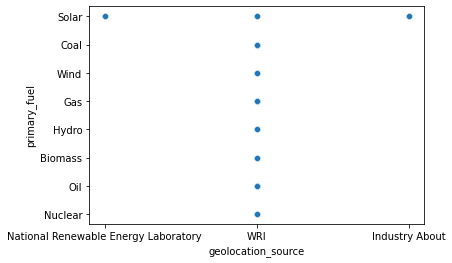

In [54]:
sns.scatterplot(data['geolocation_source'],data['primary_fuel'])

solar has all type of geolocation source while other classes of primary_fuel has only WRI geolocation_source.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

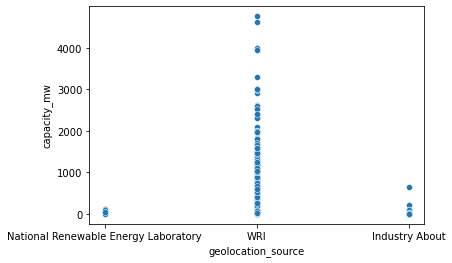

In [55]:
sns.scatterplot(data['geolocation_source'],data['capacity_mw'])

WRI type of location has highest capacity of electricity generation..

<AxesSubplot:ylabel='primary_fuel'>

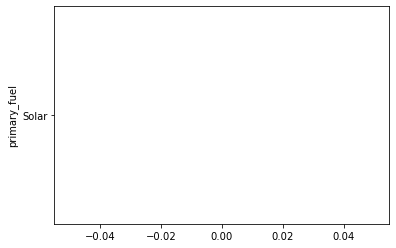

In [56]:
sns.scatterplot(data['generation_gwh_2013'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2013 while other primary_fuel.

<AxesSubplot:ylabel='capacity_mw'>

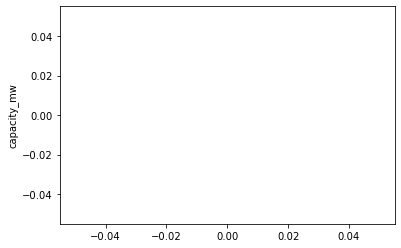

In [57]:
sns.scatterplot(data['generation_gwh_2013'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2013 higher the capacityof elecricity generation.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

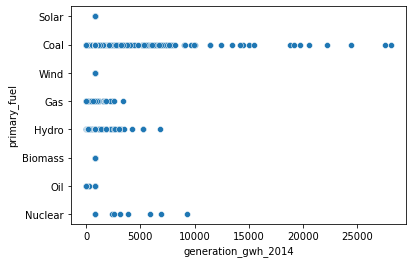

In [58]:
sns.scatterplot(data['generation_gwh_2014'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2014 while other primary_fuel.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

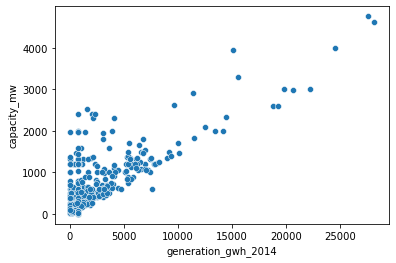

In [59]:
sns.scatterplot(data['generation_gwh_2014'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2014 higher the capacityof elecricity generation.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

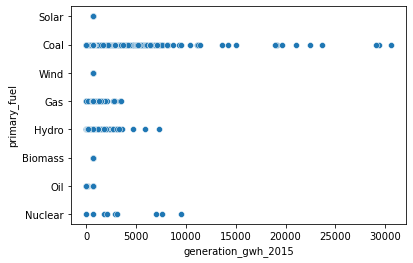

In [60]:
sns.scatterplot(data['generation_gwh_2015'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2015 while other primary_fuel.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

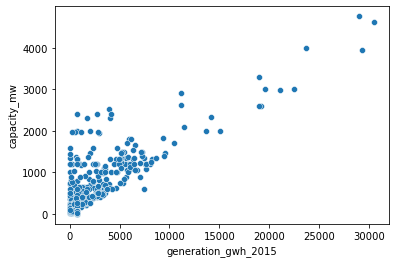

In [61]:
sns.scatterplot(data['generation_gwh_2015'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2015 higher the capacityof elecricity generation.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

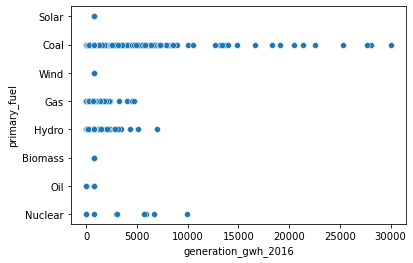

In [62]:
sns.scatterplot(data['generation_gwh_2016'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2016 while other primary_fuel.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

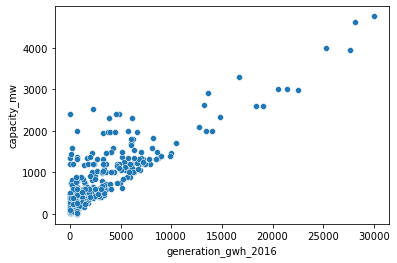

In [63]:
sns.scatterplot(data['generation_gwh_2016'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2016 higher the capacityof elecricity generation.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

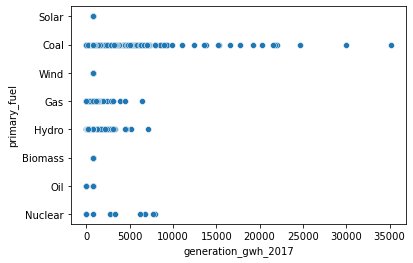

In [64]:
sns.scatterplot(data['generation_gwh_2017'],data['primary_fuel'])

coal has the highest electricity generation in gigawatt-hours reported for the year 2017 while other primary_fuel.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

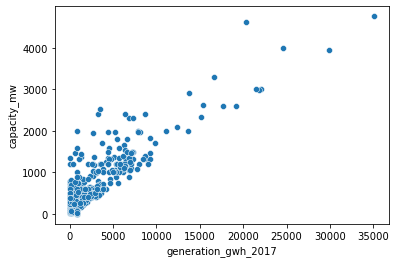

In [65]:
sns.scatterplot(data['generation_gwh_2017'],data['capacity_mw'])

these columns are linearly dependent. higher the generation of fuel in 2017 higher the capacityof elecricity generation.

from yearb 2013 to 2017 the demand or production of coal is very high as compared to oher fuels.

<AxesSubplot:xlabel='generation_data_source', ylabel='primary_fuel'>

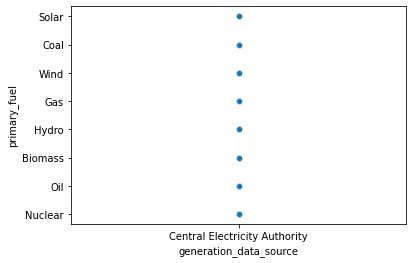

In [66]:
sns.scatterplot(data['generation_data_source'],data['primary_fuel'])

the generatiion for wind and Hydro and for Nuclear is having less generation of source. But for Solar and coal has highest generation source.

<AxesSubplot:xlabel='generation_data_source', ylabel='capacity_mw'>

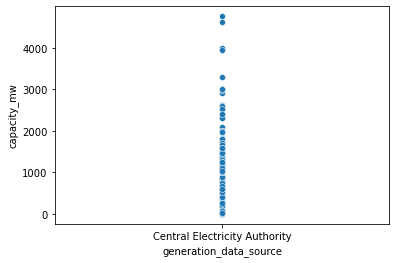

In [67]:
sns.scatterplot(data['generation_data_source'],data['capacity_mw'])

the is only one values in this columns.

<AxesSubplot:xlabel='source', ylabel='capacity_mw'>

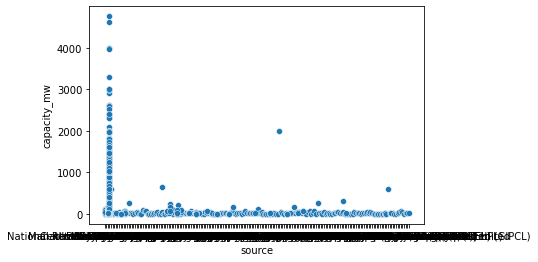

In [68]:
sns.scatterplot(data['source'],data['capacity_mw'])

<AxesSubplot:xlabel='source', ylabel='primary_fuel'>

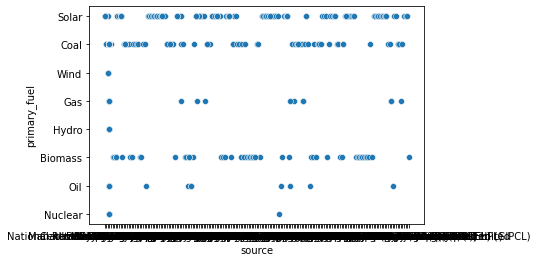

In [69]:
sns.scatterplot(data['source'],data['primary_fuel'])

Central Electricity Authority has the highest capacity of genearing electricity.

the generatiion for wind and Hydro and for Nuclear is having less generation of source. But for Solar and coal has highest generation source.

In [70]:
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,801.123775,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority


In [71]:
le=LabelEncoder()
data['name']=le.fit_transform(data.name)
data['gppd_idnr']=le.fit_transform(data.gppd_idnr)
data['primary_fuel']=le.fit_transform(data.primary_fuel)
data['owner']=le.fit_transform(data.owner)
data['source']=le.fit_transform(data.source)
data['geolocation_source']=le.fit_transform(data.geolocation_source)


In [72]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,Oil,2011.000000,229,109,http://www.nrel.gov/csp/solarpaces/project_det...,1,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
1,1,519,98.0,24.7663,74.6090,1,Oil,1997.091082,258,174,http://www.ultratechcement.com/,2,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
2,2,853,39.2,21.9038,69.3732,7,Oil,1997.091082,2,21,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,Central Electricity Authority
3,3,0,135.0,23.8712,91.3602,2,Oil,2004.000000,5,22,http://www.cea.nic.in/,2,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,4,1,1800.0,21.9603,82.4091,1,Oil,2015.000000,5,22,http://www.cea.nic.in/,2,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority


In [73]:
data['other_fuel1']=le.fit_transform(data['other_fuel1'])
data['generation_data_source']=le.fit_transform(data['generation_data_source'])
data['url']=le.fit_transform(data.url)

In [74]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,0
1,1,519,98.0,24.7663,74.6090,1,2,1997.091082,258,174,173,2,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,0
2,2,853,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,0
3,3,0,135.0,23.8712,91.3602,2,2,2004.000000,5,22,58,2,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0
4,4,1,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,58,2,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0


In [75]:
data.shape

(907, 20)

### Checking Outliers

In [76]:
features=data.drop(columns=['capacity_mw','primary_fuel'])
target=data[['capacity_mw','primary_fuel']]

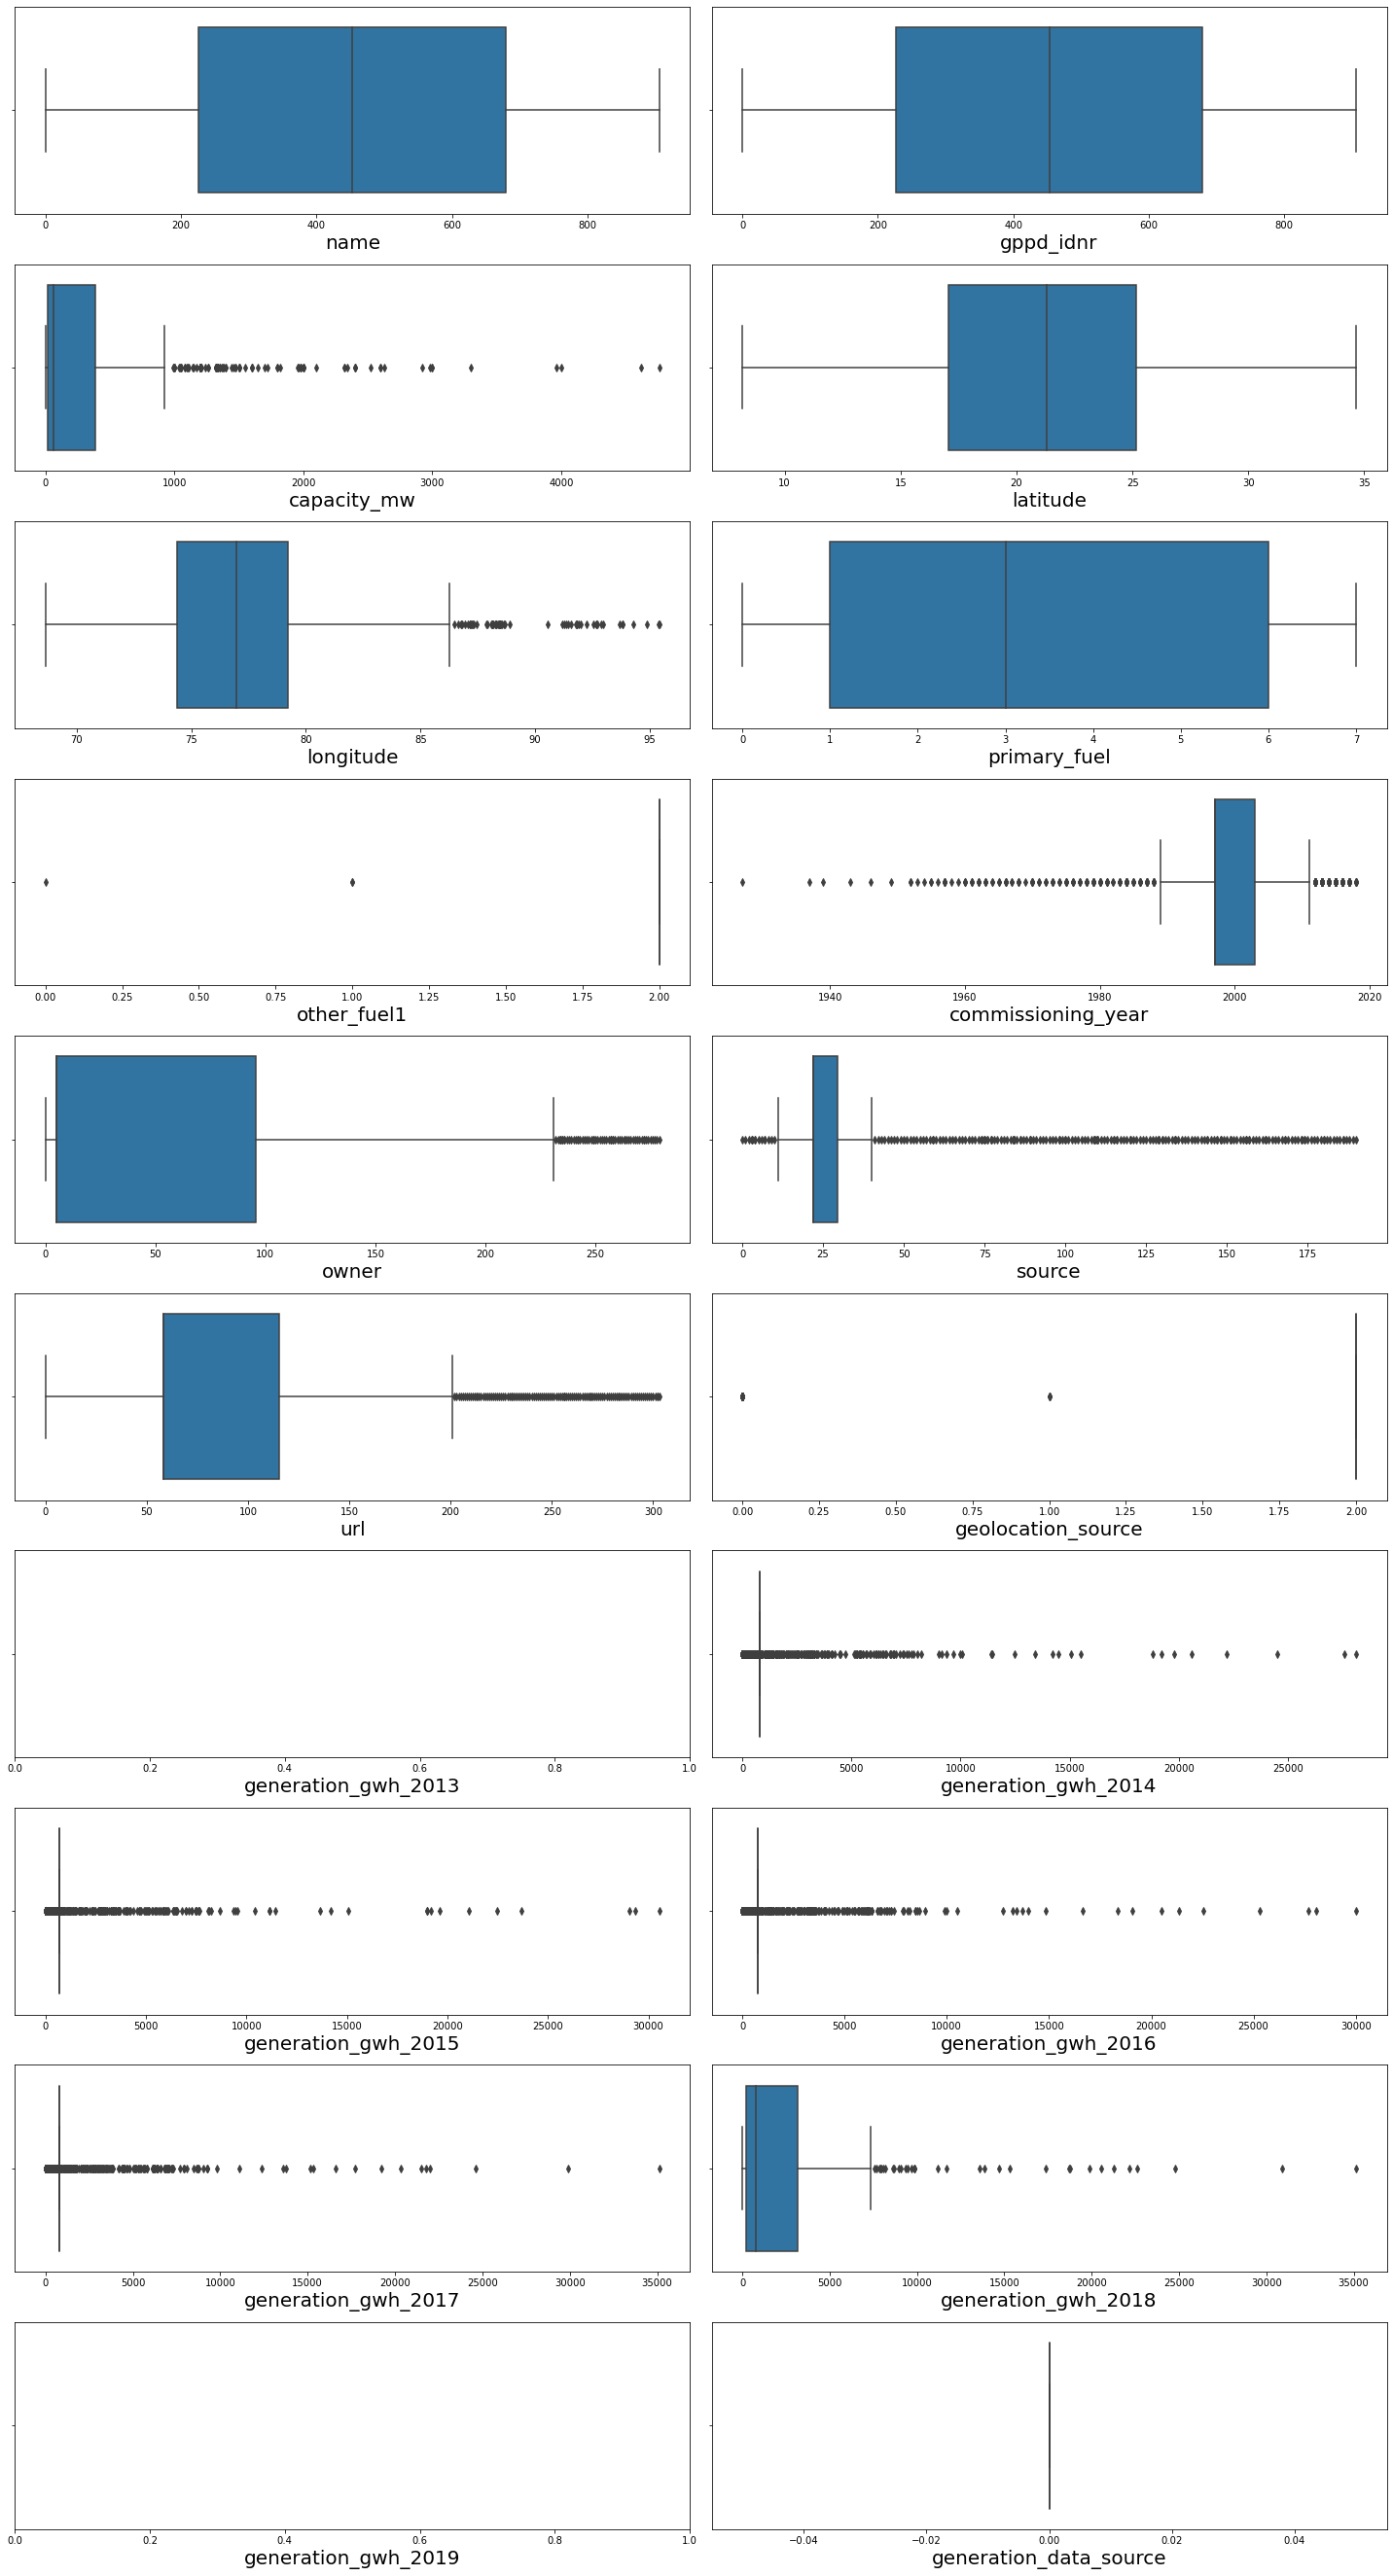

In [77]:

plt.figure(figsize=(20,40))
graph=1
for col in data:
    if graph<=21:
        plt.subplot(11,2,graph)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

there are outliers in our dataset.We have to use Z-score technique to remove these outliers.

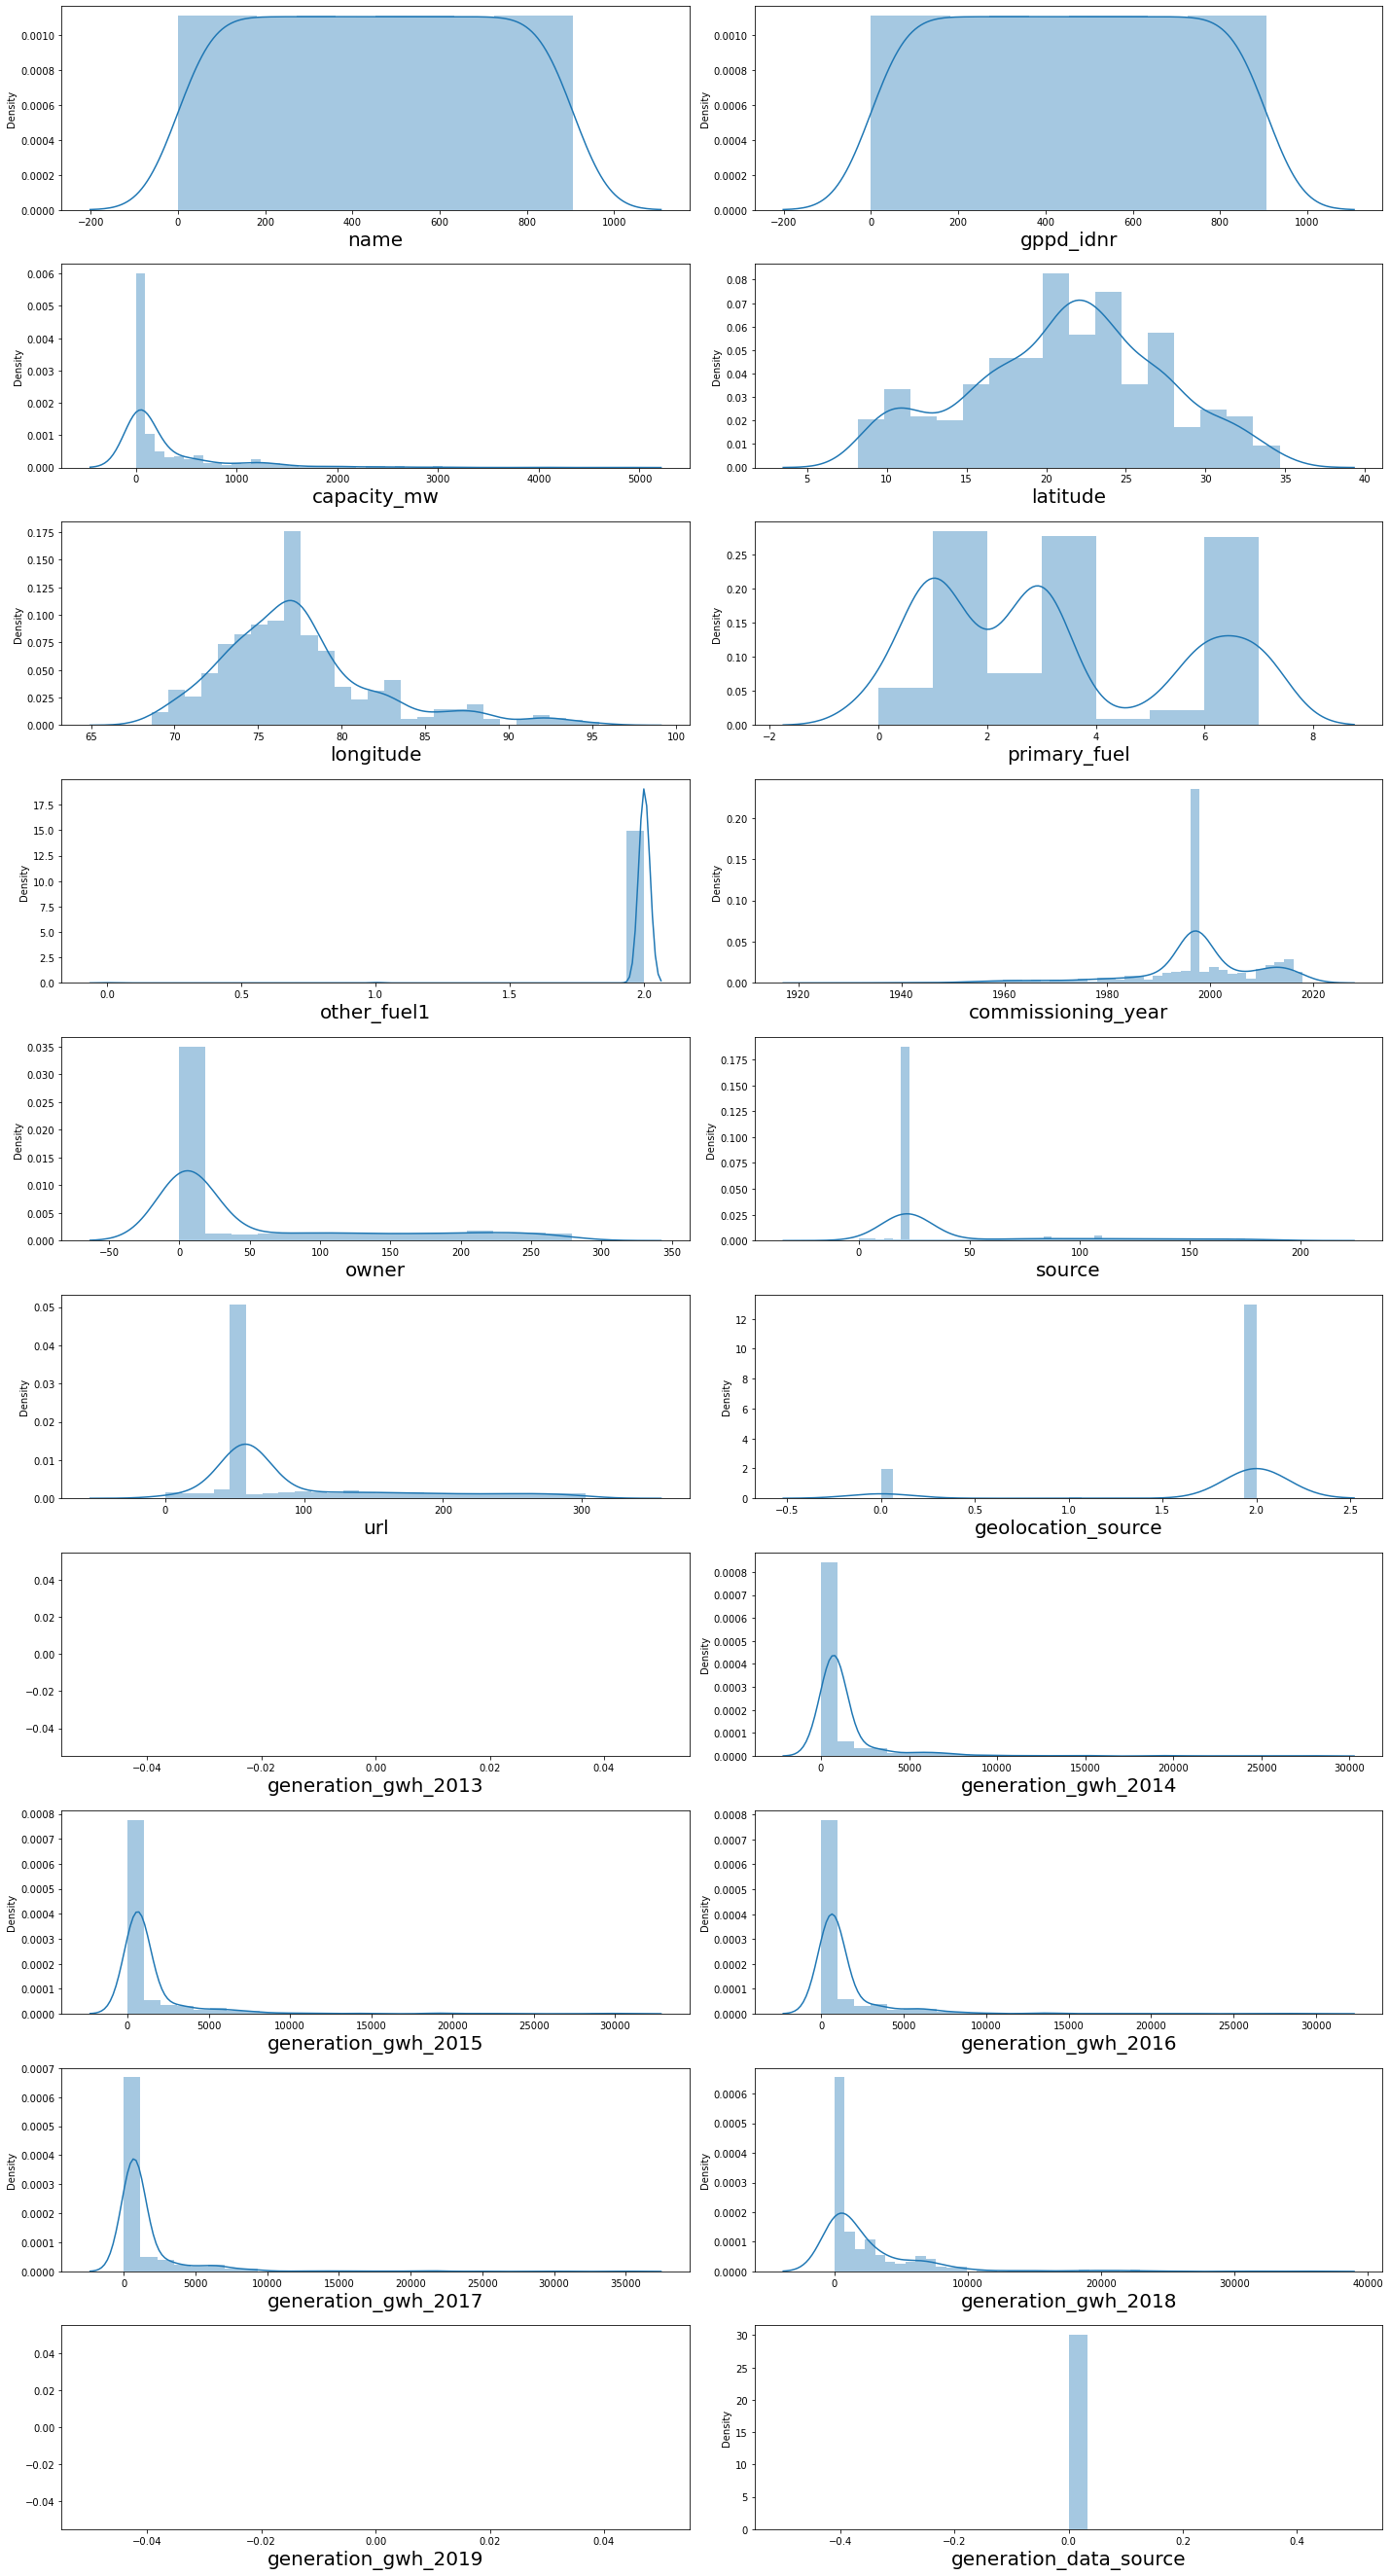

In [78]:

plt.figure(figsize=(20,40))
graph=1
for col in data:
    if graph<=21:
        plt.subplot(11,2,graph)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize='20')
    graph+=1
plt.tight_layout()

name,gppd_idnr,latitude,primary_fuel   seems to be normally distributed while others are skwed.           

In [79]:
data.skew()

name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.399359
owner                      1.364406
source                     1.827373
url                        1.510537
geolocation_source        -2.159841
generation_gwh_2013             NaN
generation_gwh_2014        5.321360
generation_gwh_2015        5.566773
generation_gwh_2016        5.281953
generation_gwh_2017        5.315103
generation_gwh_2018        3.476298
generation_gwh_2019             NaN
generation_data_source     0.000000
dtype: float64

name,gppd_idnr,latitude,primary_fuel are in range of -0.5 to 0.5. So these are not skewed data while others are skewed.

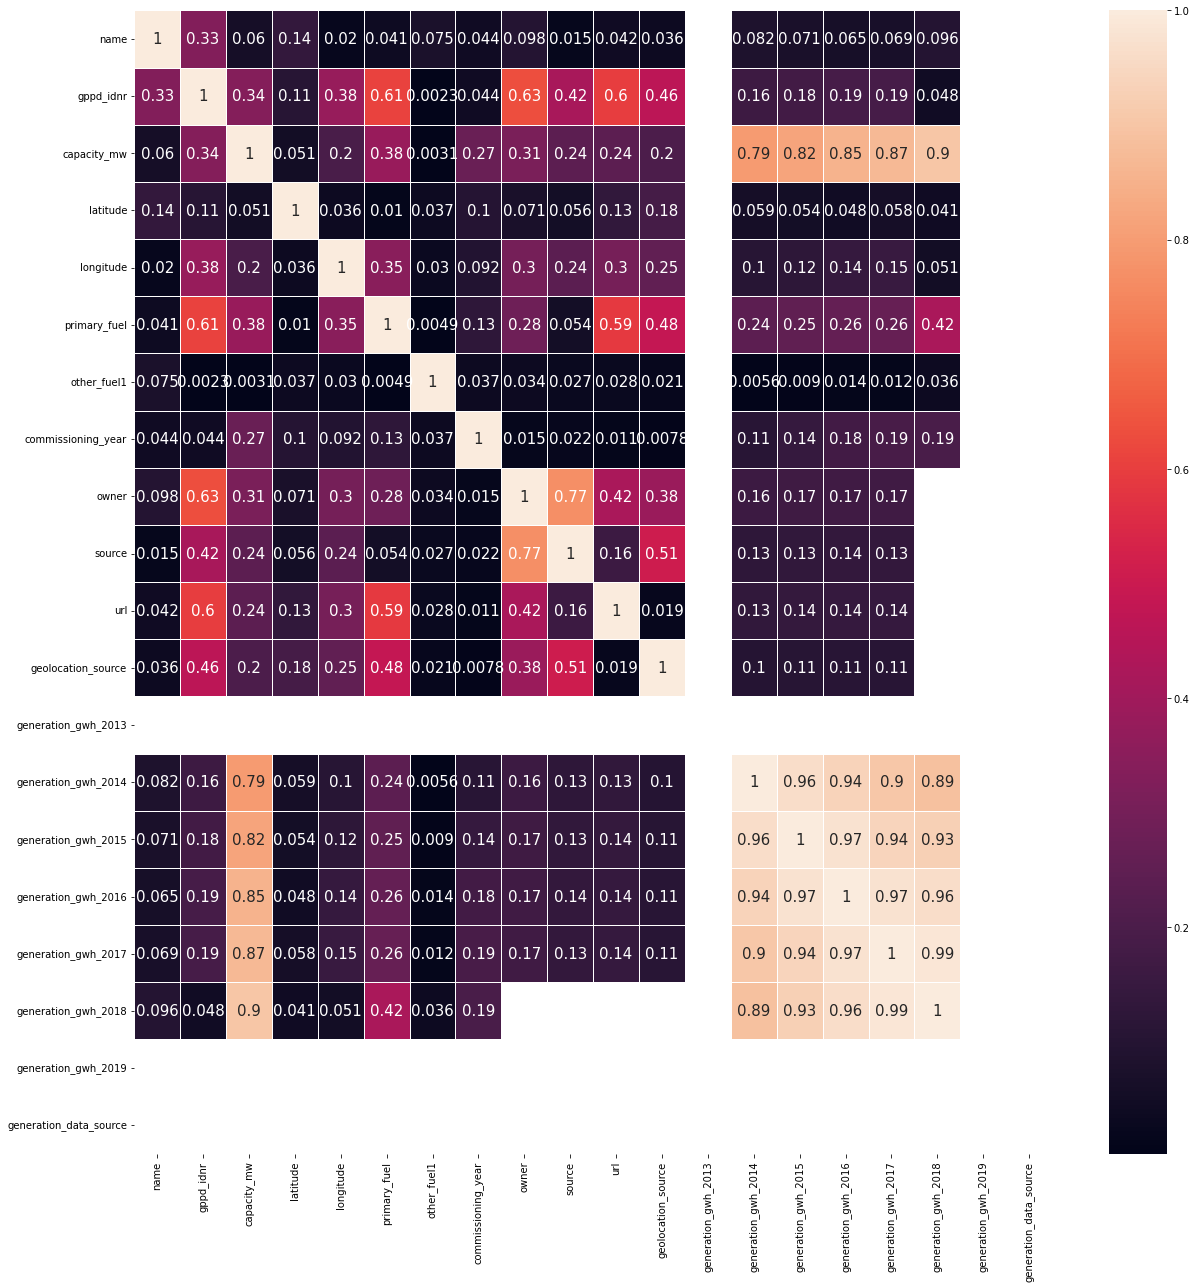

In [80]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

there are some columns of generation growth in which multi-colinearit exiss between their years.

<AxesSubplot:>

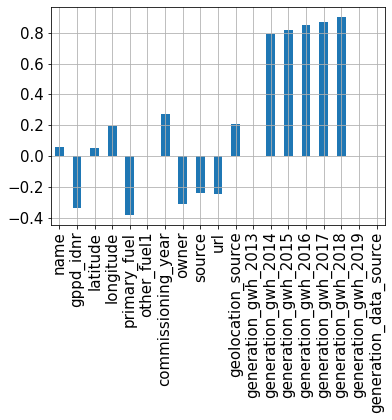

In [81]:
data.drop('capacity_mw',axis=1).corrwith(data.capacity_mw).plot(kind='bar',grid=True,fontsize=15)

other_fuel1 & generation data_source has least relation with the capacity_mw.

<AxesSubplot:>

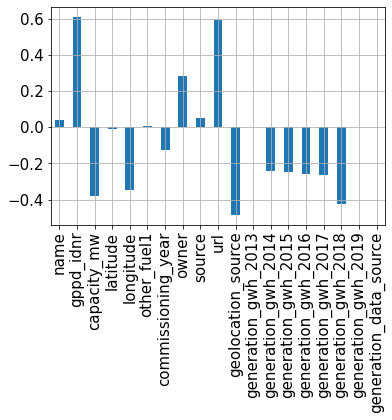

In [82]:
data.drop('primary_fuel',axis=1).corrwith(data.primary_fuel).plot(kind='bar',grid=True,fontsize=15)

latitude,other_fuel1 & generation data_source has least relation with primary_fuel.

In [83]:
data.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source'],
      dtype='object')

In [84]:
data.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,0.0,907.000000,907.000000,907.000000,907.000000,448.000000,0.0,907.0
mean,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,56.169791,43.847850,94.469680,1.733186,NaN,1516.689956,1510.071296,1565.361383,1657.121797,2600.804099,NaN,0.0
std,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,82.529116,44.642818,70.381222,0.677151,NaN,2785.604307,2984.994556,3005.087210,3046.862910,4314.880456,NaN,0.0
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0
25%,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,5.000000,22.000000,58.000000,2.000000,NaN,801.123775,711.181225,737.205450,817.977250,193.378250,NaN,0.0
50%,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,5.000000,22.000000,58.000000,2.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,0.0
75%,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,95.500000,29.500000,115.500000,2.000000,NaN,801.123775,711.181225,737.205450,817.977250,3143.535900,NaN,0.0
max,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,0.0


name,gppd_idnr these two columns has unique values. that has to removed.

capacity_mw,generation of all years has mean> std. for that we have to use sqrt to now accurate our data.

In [85]:
data.drop(columns=['name','gppd_idnr'],inplace=True)

In [86]:
data['capacity_mw']=np.sqrt(data.capacity_mw)
data['generation_gwh_2013']=np.sqrt(data.generation_gwh_2013)
data['generation_gwh_2017']=np.sqrt(data.generation_gwh_2017)
data['generation_gwh_2015']=np.sqrt(data.generation_gwh_2015)
data['generation_gwh_2014']=np.sqrt(data.generation_gwh_2014)
data['generation_gwh_2016']=np.sqrt(data.generation_gwh_2016)

In [87]:
data=data[~data.isin([np.nan,np.inf,-np.inf])]
data.dropna(inplace=True)

In [88]:
data=data.drop(columns=["generation_gwh_2016","generation_gwh_2014","generation_data_source"])

In [89]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019


this we did as there was multi-colinearty existed that we see in the heatmap.

In [90]:
df=data.copy()

#### Droppping duplicates

In [116]:
df.drop_duplicates(inplace=True)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019


In [117]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now its seems to be accurate.

### `Removing Outliers for both dataframe`

In [118]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2015', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

In [119]:
#Removing for prediction of capacity target variable dataset.
zs=zscore(df[[ 'longitude','commissioning_year', 'owner', 'source', 'url','geolocation_source', 'generation_gwh_2013', 'generation_gwh_2015','generation_gwh_2017']])
filtered=(np.abs(zs)<3).all(axis=1)
df=df[filtered]

In [120]:
df.shape

(0, 15)

#### Dataloss

In [121]:
print("Lost data ::"+str(round(((908-837)/908)*100,2))+"%")

Lost data ::7.82%


#### `Normalizing Distribution`

In [122]:
df.skew()

capacity_mw           NaN
latitude              NaN
longitude             NaN
primary_fuel          NaN
other_fuel1           NaN
commissioning_year    NaN
owner                 NaN
source                NaN
url                   NaN
geolocation_source    NaN
generation_gwh_2013   NaN
generation_gwh_2015   NaN
generation_gwh_2017   NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
dtype: float64

In [123]:
#from sklearn import datasets
features=["longitude","commissioning_year","owner","source","url","geolocation_source",'generation_gwh_2013', 'generation_gwh_2015', 'generation_gwh_2017',]
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
df[features]=scalar.fit_transform(df[features].values)
df[features].head()

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required.

In [124]:
df.skew()

capacity_mw           NaN
latitude              NaN
longitude             NaN
primary_fuel          NaN
other_fuel1           NaN
commissioning_year    NaN
owner                 NaN
source                NaN
url                   NaN
geolocation_source    NaN
generation_gwh_2013   NaN
generation_gwh_2015   NaN
generation_gwh_2017   NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
dtype: float64

the value that are in range of -0.5 to 0.5. are not skewed.

## `Model Deployment for Regression Problem(Predicting Capacity_mw)`

In [125]:
X=df.drop(columns=['capacity_mw'],axis=1)
Y=df['capacity_mw']

split features and target variable.

### `Normalizing the data`

In [131]:
from sklearn import preprocessing
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

ValueError: Found array with 0 sample(s) (shape=(0, 14)) while a minimum of 1 is required by StandardScaler.

In [127]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
Bagging=BaggingRegressor()
GradientBoosting=GradientBoostingRegressor()

In [128]:
algo=[Linear,DecisionTree,RandomForest,Bagging,GradientBoosting]

In [129]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(100,180):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=r2_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
            mae=mean_absolute_error(Y_test,Y_pred)
            mse=mean_squared_error(Y_test,Y_pred)
            rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))

    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"\n\n{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\nMEAN ABSOLUTE ERROR:",mae)

    print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
    print(f"\nROOT MEAN SQUARED ERROR for the model:",rmse)

NameError: name 'X_' is not defined

In [130]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,20):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------




NameError: name 'X_' is not defined

In [ ]:
CVmodel

In [ ]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

here for model RandomForestRegressor we get the least value i.e. the difference between the accuracy and cvScore of this model is 7.43 .

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.25,random_state=147)

#### `Plotting regplot graph for BaggingRegressor model`

In [ ]:
RandomForest.fit(X_train,Y_train)
Y_pred=Bagging.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are close and some are deviated too to the best fit line.

## Regularization

In [ ]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

In [ ]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

Here we can see that our model is not overfitted or underfitted as the r2 score Lasso model is 72.16 while the RandomForest r2-score is 91.32.

### `Hyper parameter Tuning`

In [ ]:
reg=RandomForestRegressor()

param={
    'n_estimators':range(98,105,2),
    'criterion':["squared_error", "absolute_error"],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3]
}
grd=GridSearchCV(reg,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

reg=grd.best_estimator_   #reinstantiating the beast parameter to algo

reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

print("Accuracy::",r2_score(Y_test,Y_pred))

mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print("\nMEAN ABSOLUTE ERROR:",mae)

print(f"\nMEAN SQUARED ERROR for the model:",mse)
    
print(f"\nROOT MEAN SQUARED ERROR for the model:",np.sqrt(mse))

In [ ]:
sns.regplot(Y_pred,Y_test)
plt.xlabel("Predicted Values for capacity")
plt.ylabel("Actual values for capacity")
plt.tight_layout()

Here we analyse that the data points are close to the best fit line.

## Saving model

In [ ]:
import pickle
pickle.dump(reg,open("GLobalPowerPlant_CapacityPrediction.pickle","wb"))

## Model Deployment for Classification Problem

In [ ]:
X=df.drop(columns=['primary_fuel'],axis=1)
Y=df['primary_fuel']

In [ ]:
sns.countplot(df['primary_fuel'])

Seems to be not Balanced.

In [ ]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [ ]:
sns.countplot(Y)

Now for everyClass the target variable is  balanced.

In [ ]:
X.shape

Now there are 1888 no. of records.

### Normalizing the features

In [ ]:
scalar=StandardScaler()

X_=scalar.fit_transform(X)

X_

In [ ]:
Linear=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()

In [ ]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost,Bagging]

In [ ]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(150,189,4):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [ ]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()

In [ ]:
CVmodel

here we can see the maximun CV score of each model

In [ ]:
m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

here for model DecisionTreeClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 1.55 .

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=158)

here we take RandomState 158 because it is the best to use for DecisionTreeClassifier

In [ ]:
Linear.fit(X_train,Y_train)
DecisionTree.fit(X_train,Y_train)
RandomForest.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
AdaBoost.fit(X_train,Y_train)
Bagging.fit(X_train,Y_train)

In [ ]:
Y_pred_linear=Linear.predict(X_test)
Y_pred_prob_linear=Linear.predict_proba(X_test)

Y_pred_dt=DecisionTree.predict(X_test)
Y_pred_prob_dt=DecisionTree.predict_proba(X_test)

Y_pred_rf=RandomForest.predict(X_test)
Y_pred_prob_rf=RandomForest.predict_proba(X_test)

Y_pred_knn=knn.predict(X_test)
Y_pred_prob_knn=knn.predict_proba(X_test)

Y_pred_ada=AdaBoost.predict(X_test)
Y_pred_prob_ada=AdaBoost.predict_proba(X_test)

Y_pred_br=Bagging.predict(X_test)
Y_pred_prob_br=Bagging.predict_proba(X_test)
print("All models test scored are captured!!")

### `DecisionTree`

In [ ]:
print("AUC ROC Score of V Model :",roc_auc_score(Y_test, Y_pred_prob_dt, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_dt[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `RandomForest`

In [ ]:
print("AUC ROC Score of V Model :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_rf[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### KNN

In [ ]:
print("AUC ROC Score of Knn Model :",roc_auc_score(Y_test, Y_pred_prob_knn, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_knn[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `AdaBoost`

In [ ]:
print("AUC ROC Score of AdaBoost Model :",roc_auc_score(Y_test, Y_pred_prob_ada, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_ada[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `Bagging`

In [ ]:
print("AUC ROC Score of Baggin Model :",roc_auc_score(Y_test, Y_pred_prob_br, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_br[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

### `Linear`

In [ ]:
print("AUC ROC Score of Linear Model :",roc_auc_score(Y_test, Y_pred_prob_linear, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_linear[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

Here we plot the Roc Curve for each model with their Auc_roc_score.

## `Hyperparameter Tuning`

In [ ]:
para={
    'criterion':['gini','entropy'],
    'min_samples_split':[1,2],
    'min_samples_leaf':[1,2],
    'min_impurity_decrease':[0.0,0.1],
    'min_samples_leaf':[1,2]
}

In [ ]:
grid=GridSearchCV(estimator=DecisionTree,cv=8,param_grid=para,n_jobs=-1)
grid.fit(X_train,Y_train)
grid.best_params_

In [ ]:
DecisionTree=DecisionTreeClassifier(criterion='entropy',min_impurity_decrease= 0.0,min_samples_leaf= 1,min_samples_split= 2)
DecisionTree.fit(X_train,Y_train)

Y_pred=DecisionTree.predict(X_test)
accuracy_score(Y_pred,Y_test)

here now slight increase in accurcy.

In [ ]:
Y_pred_prob=DecisionTree.predict_proba(X_test)

print("AUC ROC Score of DecisionTree model using DecisionTree as base estimator :",roc_auc_score(Y_test, Y_pred_prob, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

showing roc_Auc Curve for DecisionTree.

### Saving Model

In [ ]:
import pickle
pickle.dump(DecisionTree,open("globalPowerPlant_predictingPrimaryFuel.pickle","wb"))